In [70]:
from sklearn.datasets import fetch_openml
minst = fetch_openml("mnist_784", version=1)
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [71]:
X, y = minst["data"], minst["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [72]:
import numpy as np 
X_array = np.array(X)
y_array = np.array(y)

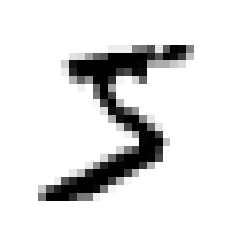

Output = 5


In [73]:
# An image will have pixels from range(0,255)
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_array[0]
some_digit_image = some_digit.reshape(28,-1)

plt.imshow(some_digit_image, cmap="binary", interpolation = "nearest")
plt.axis("off")
plt.show()
print(f"Output = {y_array[0]}")

In [74]:
y[0]

'5'

In [75]:
# From above we can say that labels are strings.
# We prefer number, so we change the labels form string to int,
#     using the below function.
y = y.astype(np.uint8)
y[0]

5

In [76]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [77]:
# Let's first Train a binary classifier
# This classifier should have only 2 classes -> 5 and not-5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [78]:
print(f"Output: {y[0]}")
sgd_clf.predict([some_digit])

Output: 5


array([ True])

In [79]:
# A good way to evaluate a model is to use cross-validation
# You need to get more hold on cross_validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [80]:
# Accuracy will be always high. this is because 10% of them are 5.
# So, if you always guess that an image is not a 5. You will ne right 90% of the time.
'''
This demonstrates why accuracy is generally not the preferred performance measure for classifier, 
espicially when we are dealing withh skewed datasets (when some classes are much more frequesnt that others.)

A much better way to evalute the performance of a classifier is Confusion Matrix.
The general idea is to count the number of times instances of class A are classified as class B.

example: To know the number of times the classifieer confused images of 5s with 3s, 
            you would look in the 5th row and 3rd column of the confusion matrix
'''

# cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation score like cross_validation_score(), it returns the predictions made on each test fold.
# This means that you get a clean prediction for each instance in the training set.
# (here "clean" meaning that the prediction is made by a model that never sasw the data during training)
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
# This is predicting all the predicted values.

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# we are checking, how y is equal to x

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [81]:
"""
53892 are classified as Non-5's correctly. (True negatives)
687 are wrongly classified as 5's.  (false positive)
1891 are wrongly classified as Non-5's. (false negative)
3530 are classified as 5's correctly. (True positive)

---                                     ---
| (True Negative)        (False positive) |
| (False Negative)       (True Positive)  |
---                                     ---


"""

"\n53892 are classified as Non-5's correctly. (True negatives)\n687 are wrongly classified as 5's.  (false positive)\n1891 are wrongly classified as Non-5's. (false negative)\n3530 are classified as 5's correctly. (True positive)\n\n---                                     ---\n| (True Negative)        (False positive) |\n| (False Negative)       (True Positive)  |\n---                                     ---\n\n\n"

In [82]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [83]:
'''
The confusion matrix gives you a lot of information, but sometimes we may prefer a more onided metric.
An interesting one to look at is the accuracy of the positive prediction, this is called the precision of the classifier.

'''
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
'''
Recall is also known as rate of True positives, it is the ratio of positive instances that are correctly detected by the classifier.
'''

'\nRecall is also known as rate of True positives, it is the ratio of positive instances that are correctly detected by the classifier.\n'

In [84]:
from sklearn.metrics import recall_score, precision_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))


0.8370879772350012
0.6511713705958311


In [85]:
'''
The F1-score is the harmonic mean of precision and recall. Where as the regular mean treats all the values equally,
 where as the harmonic mean gives more weight to low values.
 as a result the classifier will only get a high F1-score only if both recall and precision are high.
'''
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [86]:
# Precision/Recall Tradeoff
"""
Unfortunately, we can't have it both ways. increasing precision reduces recall, and vice-versa. 
    * This is called the precision/recall tradeooff. *
"""

"\nUnfortunately, we can't have it both ways. increasing precision reduces recall, and vice-versa. \n    * This is called the precision/recall tradeooff. *\n"

In [87]:
"""
sklearn does not let us set the threshold direclty, but it does give us access 
to the decision scores that it uses to make predictions. 
"""
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [88]:
# So, Now we can set the threshold. :)
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [89]:
threshold = 8000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [90]:
'''
This confirms that raising the threshold decreases the recall.

*How do you decide which threshold to use? *
First need to get the scores of all instaces in the training set using the cross_val_predict() function again
but this time specifying that we want it to return decision scores instead of predictions.
'''

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

# Now with this scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function


In [91]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [92]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.grid()

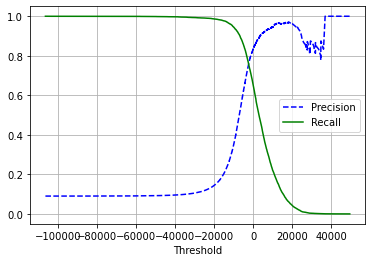

In [93]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [94]:
# from the plt clearly when threshold is increased, recall is decreasing.

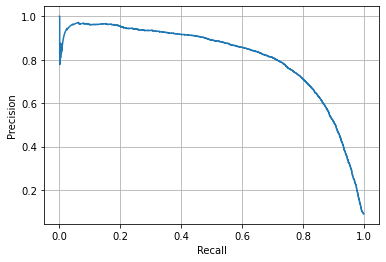

In [95]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [96]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [97]:
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]
threshold_90_recall

-106527.45300471183

In [98]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [99]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [100]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [101]:
"""
Receiver operating characteristic (ROC) curve is another common tool used with binary classifier. 
it is TPR vs FPR.
"""
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

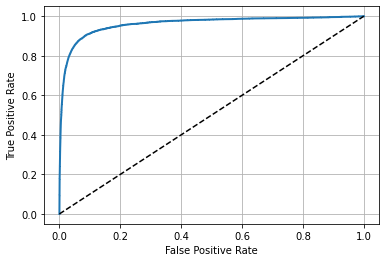

In [102]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()

plot_roc_curve(fpr, tpr)
plt.show()

In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [104]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

In [105]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

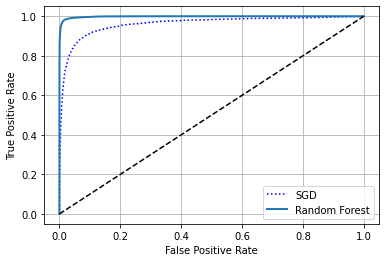

In [106]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend()
plt.show()

In [107]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [108]:
########################
# Multi-Classification #
########################

In [115]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [116]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [121]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [122]:
np.argmax(some_digit_scores)

3

In [123]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [124]:
sgd_clf.classes_[3]

3

In [125]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([5], dtype=uint8)

In [126]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [128]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

In [133]:
y_train_prped = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5860,   63,    0,    0,    0,    0,    0,    0,    0,    0],
       [6675,   67,    0,    0,    0,    0,    0,    0,    0,    0],
       [5932,   26,    0,    0,    0,    0,    0,    0,    0,    0],
       [5913,  218,    0,    0,    0,    0,    0,    0,    0,    0],
       [5821,   21,    0,    0,    0,    0,    0,    0,    0,    0],
       [1891, 3530,    0,    0,    0,    0,    0,    0,    0,    0],
       [5796,  122,    0,    0,    0,    0,    0,    0,    0,    0],
       [6251,   14,    0,    0,    0,    0,    0,    0,    0,    0],
       [5741,  110,    0,    0,    0,    0,    0,    0,    0,    0],
       [5903,   46,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

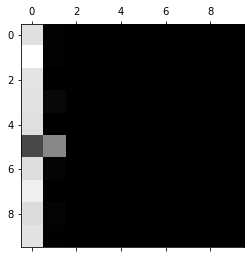

In [134]:
plt.matshow(conf_mx, cmap="gray")
plt.show()